In [1]:
import numpy as np

In [15]:
#inputs: X [[x00,x01,...x0p],...,[xN0,xN1,...xNp]] (N,p)
#        k int
#Outputs: Xc [[x00,x01,...x0p],...,[xk0,xk1,...xkp]] (k,p)
#         L [l1,l2,...,lN] (N,)

class KMeans():

    def __init__(self, k):
        self.X = None
        self.k = k
    
    def fit(self, X):
        self.X = X

        self.Xc = self.initialize(self.X)

        while True:
            self.label = self.closest_centroid(self.Xc, self.X)
            Xc_new = self.move_centroid(self.X, self.label)
            if self.stop_criteria(self.Xc, Xc_new, threshold = 1e-5):
                break
            self.Xc = Xc_new

        return self.Xc, self.label


    def initialize(self, X):
        Xc = X.copy()
        np.random.shuffle(Xc)
        return Xc[:self.k]

    def closest_centroid(self, Xc, X):
        dist = np.sqrt(np.sum((X[:,np.newaxis,:] - Xc)**2, axis = 2)) #(N,k)
        label = np.argmin(dist, axis = 1) #(N,)
        return label

    def move_centroid(self, X, label):
        Xc = np.array([np.mean(X[label == i], axis = 0) for i in range(self.k)])
        return Xc

    def stop_criteria(self, Xc_old, Xc_new, threshold = 1e-5):
        total_move = 0
        for x,y in zip(Xc_old, Xc_new):
            total_move += np.sqrt(np.sum((x - y)**2))
        return total_move < threshold


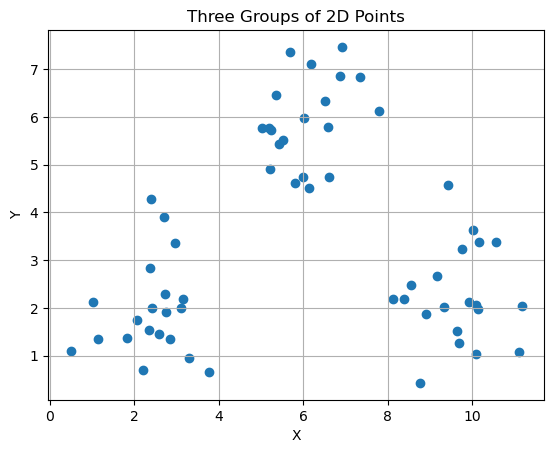

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the centers of the three groups
centers = [(2, 2), (6, 6), (10, 2)]

# Define the standard deviation for the points around the centers
std_dev = 0.8

# Number of points per group
num_points = 20

# Generate the points
points = []

for center in centers:
    # Generate random points around the center
    x_points = np.random.normal(center[0], std_dev, num_points)
    y_points = np.random.normal(center[1], std_dev, num_points)
    
    # Zip the x and y points into coordinate pairs and add them to the points list
    points.extend(list(zip(x_points, y_points)))

# Convert the list of points to a numpy array
points = np.array(points)

# Plot the points
plt.scatter(points[:, 0], points[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Three Groups of 2D Points")
plt.grid(True)
plt.show()

In [16]:
kmeans = KMeans(3)
Xc, labels = kmeans.fit(points)

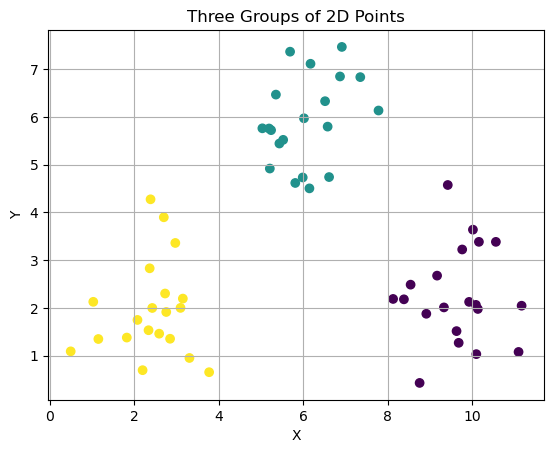

In [17]:
plt.scatter(points[:, 0], points[:, 1], c = labels)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Three Groups of 2D Points")
plt.grid(True)
plt.show()